# **Sign Language Recognition using Deep Learning: MNIST Dataset Analysis**
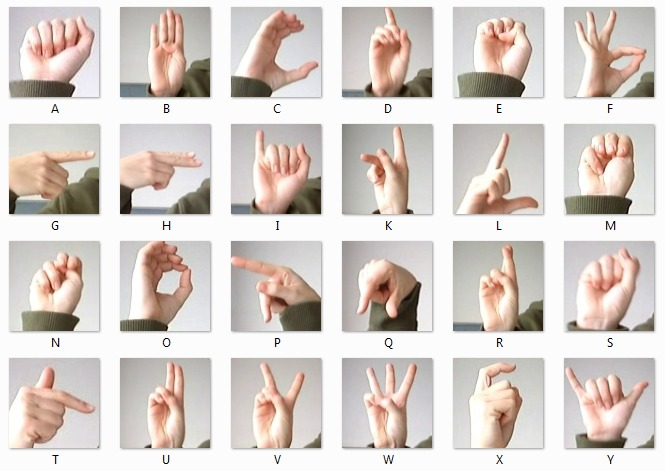

# **Abstract**:
Sign language is a crucial means of communication for individuals with hearing impairments. In this project:


* We aim to develop a fully functional AI system using deep learning techniques,
specifically neural networks, to recognize hand gestures corresponding to American Sign Language (ASL) alphabets.
* Using the Sign Language MNIST dataset, we will conduct Exploratory Data Analysis (EDA), preprocess the data, and train a classification model to accurately identify different hand signs.
* This project aims to enhance accessibility and communication by leveraging state-of-the-art deep learning models for sign language recognition.








# **Problem Statement:**
People with hearing impairments primarily rely on sign language for communication. However, many individuals are unfamiliar with sign language, creating a barrier between the deaf and hearing communities. Traditional text-based communication methods are often ineffective in real-time conversations.

The Sign Language MNIST dataset provides an opportunity to train a deep learning model using neural networks to recognize ASL alphabets from hand gesture images. This project aims to develop an AI-powered system that accurately interprets sign language symbols and translates them into readable text. By leveraging Convolutional Neural Networks (CNNs) and other deep learning techniques, we aim to create a robust model that enhances accessibility and inclusivity for individuals with hearing impairments.

## **Objectives**:


1.   Develop a Sign Language Recognition System – Train a deep learning model using neural networks to classify hand signs representing ASL alphabets.

1.   Perform Exploratory Data Analysis (EDA) – Analyze the dataset to understand its structure, distribution, and potential challenges before training the model.

1.   Preprocess and Augment Data – Apply necessary transformations, such as normalization, resizing, and augmentation, to enhance model performance and generalization.
2.   Train and Evaluate Deep Learning Models – Experiment with different neural network architectures (e.g., Convolutional Neural Networks - CNNs) to achieve high accuracy.

1.   Optimize and Fine-Tune the Model – Use techniques such as hyperparameter tuning, dropout, and batch normalization to improve the model's efficiency and robustness.











# **Name and Source of Dataset**
Dataset Name: Sign Language MNIST

Source: https://www.kaggle.com/datasets/datamunge/sign-language-mnist/data/

Description: The dataset contains images of hand signs corresponding to the
American Sign Language (ASL) alphabets, specifically A to Y (excluding J and Z, as they require motion).


### **Exploratory Data Analysis (EDA)**

      We'll analyze the dataset to understand:
        1.   Understanding the dataset and its shape
        2.   Checking the type of data and each column
        3.   Categorical and Numerical Columns
        4.   Checking for missing values and inconsistencies
        5.   Descriptive summary of the dataset
        6.   Groupby for classification problem
        7.   The distribution of images across classes
        8.   Sample images for visualization




# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
#loading the training dataset from csv file to pandas data frame
train_data = pd.read_csv('/content/sign_mnist_train.csv')

In [3]:
#printing the first five rows of the dataframe
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train_data.shape

(27455, 785)

In [5]:
#checking the datatypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [6]:
train_data.isnull().sum()

,0
label,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


In [7]:
missing_values=train_data.isnull().sum().sum()
print("Total Missing Values in Dataset:", missing_values)

Total Missing Values in Dataset: 0


In [8]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [9]:
train_data['label'].value_counts()

,count
label,
17,1294
16,1279
11,1241
22,1225
5,1204
18,1199
3,1196
14,1196
19,1186


In [10]:
train_data.groupby('label').mean()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
0,164.192718,165.654529,162.869449,161.313499,164.491119,166.727353,167.836590,168.973357,170.000888,170.912078,...,150.468028,160.253108,176.450266,187.197158,188.055062,184.572824,182.956483,182.216696,178.341918,174.761989
1,145.215842,147.747525,150.145545,152.939604,153.605941,156.361386,158.268317,159.686139,161.683168,163.297030,...,115.632673,141.738614,148.600000,147.710891,147.746535,147.806931,147.411881,146.214851,141.502970,135.559406
2,160.759615,163.133741,165.435315,167.272727,168.677448,169.820804,170.624126,171.098776,171.569056,171.852273,...,204.282343,203.943182,203.489510,205.226399,204.839161,203.986014,203.624126,203.402972,202.751748,198.966783
3,135.755853,139.376254,143.024247,148.172241,152.219900,155.625418,158.278428,160.520067,162.428930,163.739130,...,111.417224,121.210702,134.167224,142.347826,142.612040,143.934783,145.229933,143.940635,144.337793,139.172241
4,165.823406,167.623824,169.475444,171.073145,172.587252,173.821317,174.794148,175.515152,176.350052,177.073145,...,108.669801,133.425287,151.493208,167.268548,177.102403,179.031348,177.304075,174.777429,174.463950,176.704284
5,142.225914,146.210963,149.949336,153.074751,156.021595,158.924419,161.091362,162.809801,164.390365,165.755814,...,160.012458,167.903654,172.402824,173.190199,173.875415,172.589701,171.991694,170.939369,168.640365,168.648671
6,172.902752,174.281651,175.629358,177.147706,178.300917,179.241284,179.950459,180.405505,180.885321,181.056881,...,140.392661,139.537615,141.325688,139.804587,138.225688,138.670642,137.563303,132.542202,133.037615,130.490826
7,164.142152,166.440276,168.638697,170.805528,172.312932,173.537019,174.420533,175.444225,176.389931,177.032577,...,158.322804,156.843040,153.355380,158.425469,157.021718,155.765054,154.955577,146.279368,140.607108,141.894373
8,158.496558,160.747849,163.317556,165.046472,166.765921,168.179862,169.482788,170.104131,170.869191,170.419105,...,152.191910,155.416523,163.645439,168.731497,167.242685,168.965577,170.728055,168.012909,162.453528,158.351119


In [11]:
#creating a duplicate dataframe and filling missing values
train_df_filled = train_data.copy()
train_df_filled.iloc[:,1:] = train_data.groupby('label').transform(lambda x: x.fillna(x.mean()))

In [12]:
train_df_filled.isnull().sum().sum()

0

<ipython-input-13-3f66bd4f67c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df_filled['label'], palette='viridis')


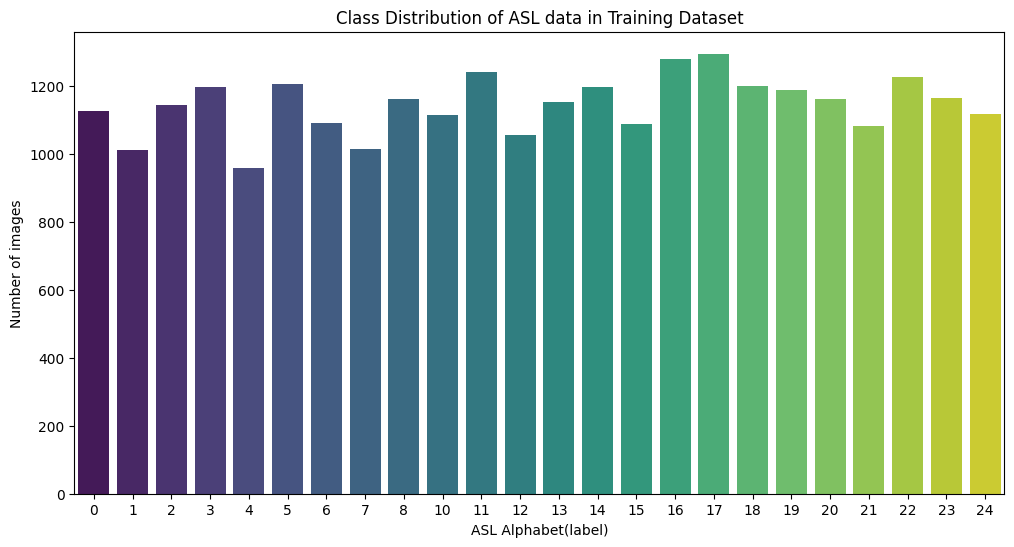

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#Count the number of samples for each label
plt.figure(figsize=(12,6))
sns.countplot(x=train_df_filled['label'], palette='viridis')

plt.title("Class Distribution of ASL data in Training Dataset")
plt.xlabel("ASL Alphabet(label)")
plt.ylabel("Number of images")
plt.xticks(rotation=0)

plt.show()

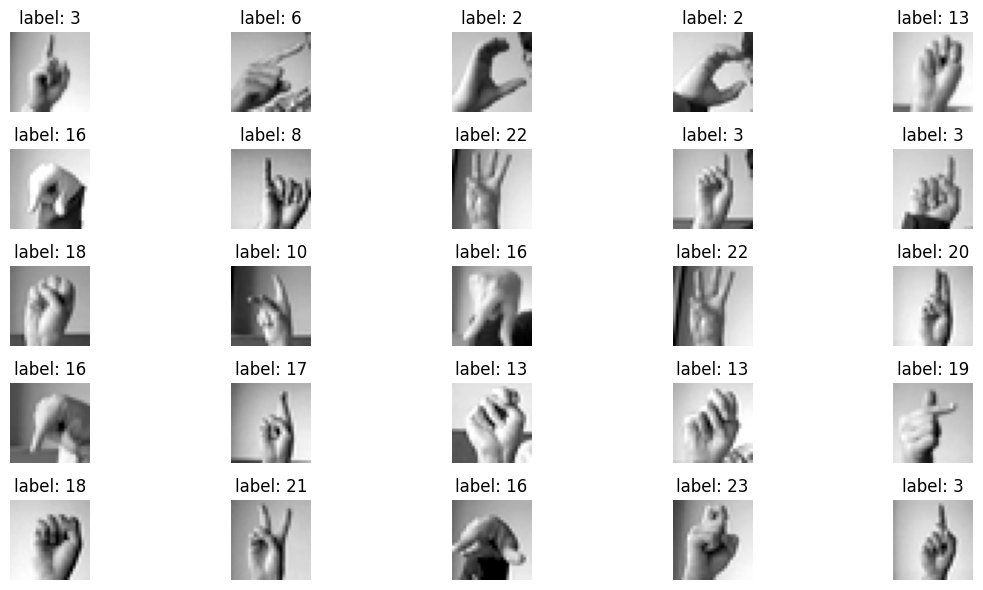

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Extract Label and pixel values
labels = train_df_filled['label'].values
images = train_df_filled.iloc[:,1:].values

#Reshape few images to 28x28
images = images.reshape(-1, 28, 28)

#Plot some sample images
fig, axes = plt.subplots(5,5, figsize=(12,6))
axes = axes.ravel()


for i in range(25):
  axes[i].imshow(images[i], cmap='gray')
  axes[i].set_title(f"label: {labels[i]}")
  axes[i].axis("off")

plt.tight_layout()
plt.show()

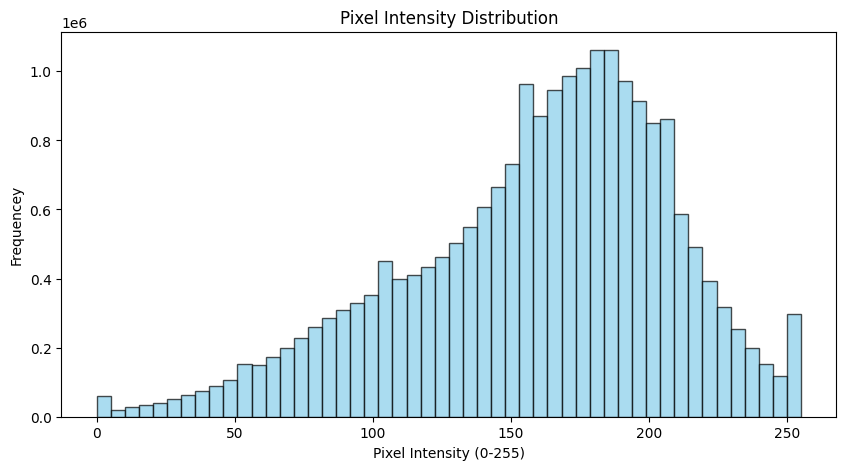

In [15]:
#Plotting Pixel Intensity Histogram
import numpy as np
import matplotlib.pyplot as plt

#Flatten all pixel values into a single array
pixel_data = train_df_filled.iloc[:, 1:].values.flatten()

#Plot histogram of Pixel intensity
plt.figure(figsize=(10,5))
plt.hist(pixel_data, bins=50, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Pixel Intensity Distribution')
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequencey")
plt.show()


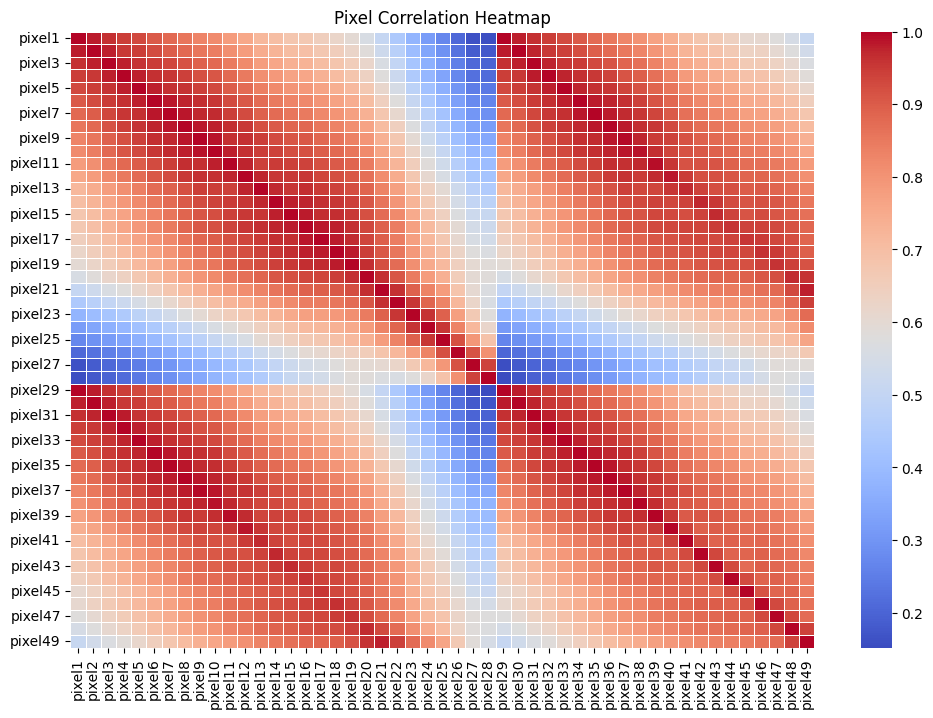

In [16]:
#Plotting heatmap of pixel correlation
import seaborn as sns

#Computing correlation matrix for small number of pixel
corr_matrix = train_df_filled.iloc[:,1:50].corr()

#Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Pixel Correlation Heatmap")
plt.show()

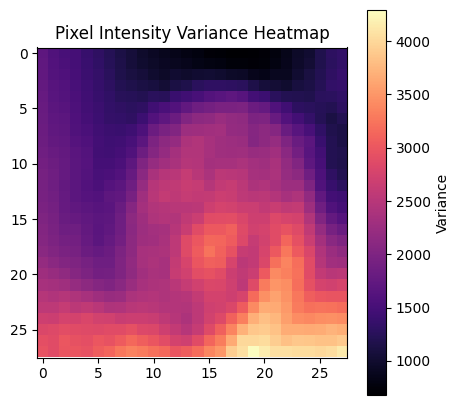

In [17]:
# Compute pixel variance for the entire dataset
pixel_variances = train_df_filled.iloc[:, 1:].var().values.reshape(28, 28)

# Plot the heatmap
plt.figure(figsize=(5, 5))
plt.imshow(pixel_variances, cmap="magma")
plt.title("Pixel Intensity Variance Heatmap")
plt.colorbar(label="Variance")
plt.show()

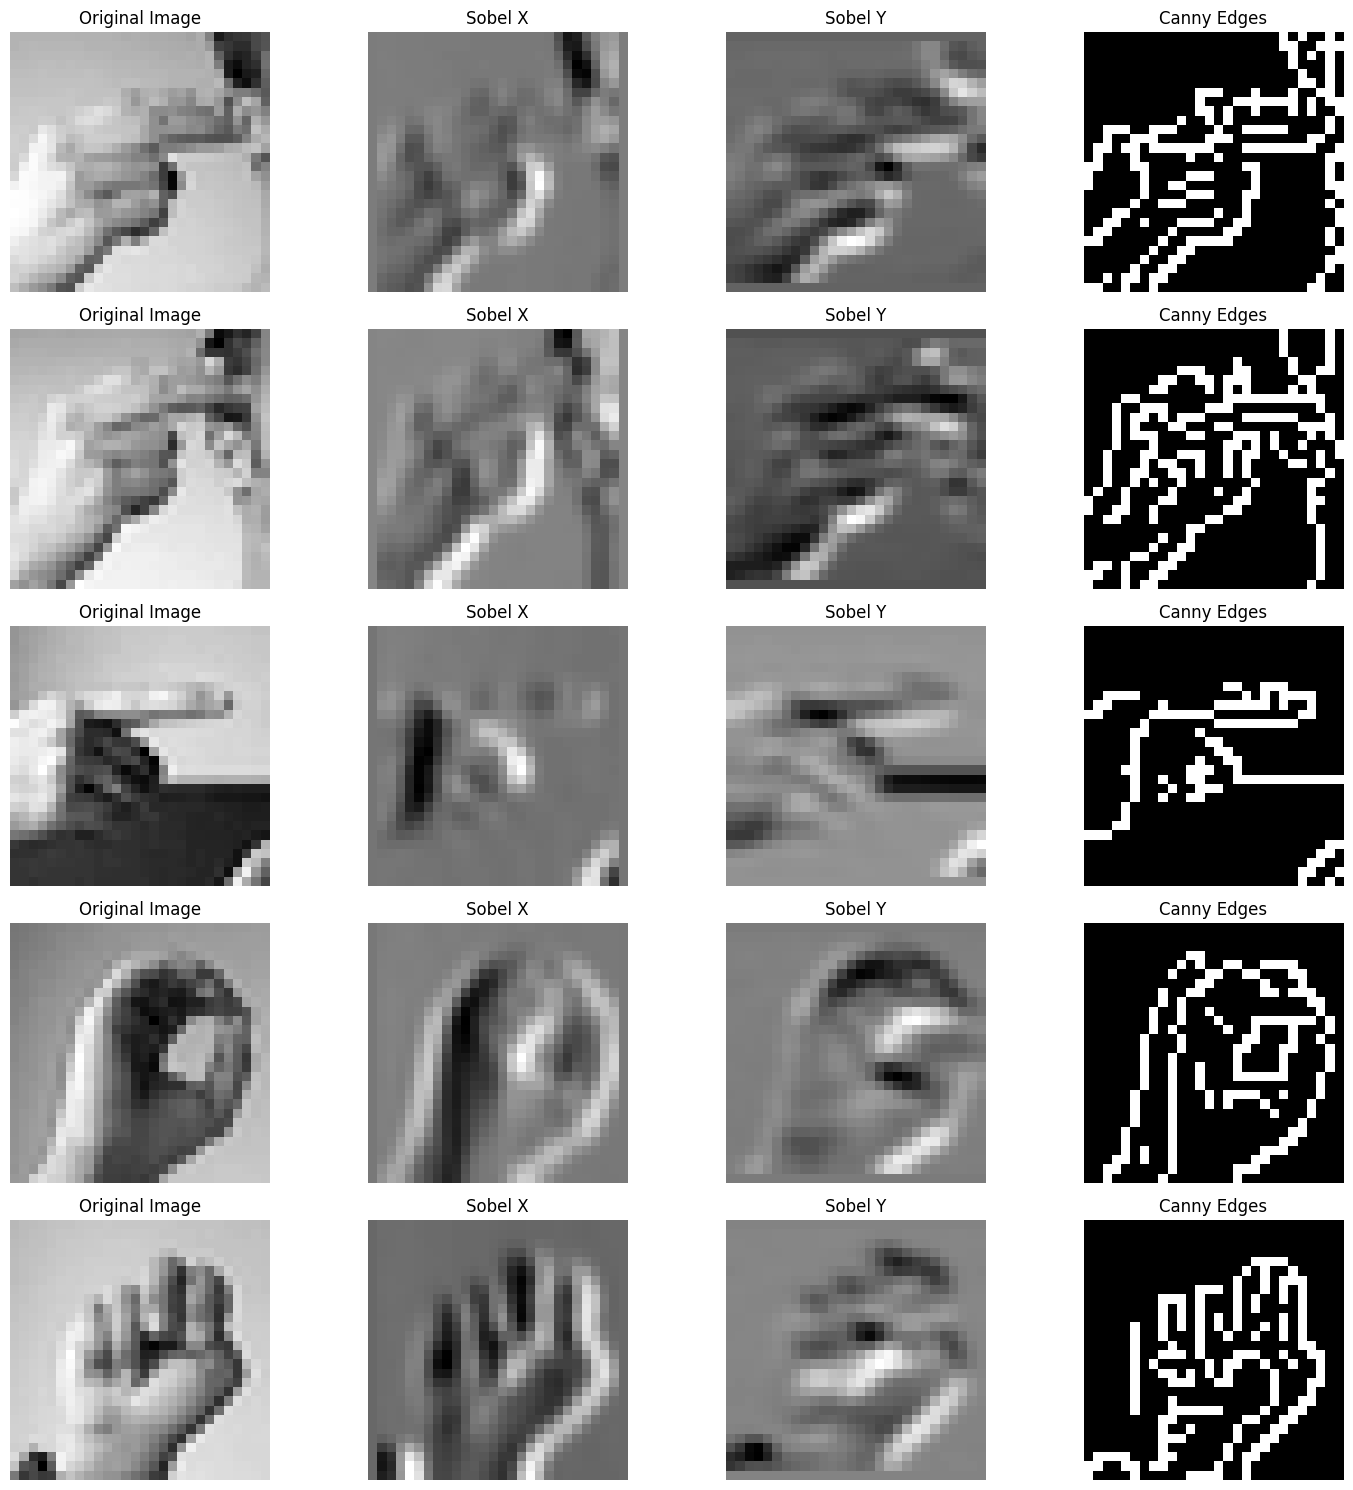

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Randomly selecting 5 images from the dataset
random_indices = np.random.choice(len(images), 5,  replace = False)
sample_images = images[random_indices]

#Plot the original and edge-detected image
fig, axes = plt.subplots(5,4, figsize=(15,15))

for i, img in enumerate(sample_images):
  img=np.uint8(img)
  sobelx = cv2.Sobel(img, cv2.CV_64F, 1,0, ksize=5)
  sobely = cv2.Sobel(img, cv2.CV_64F, 0,1, ksize=5)

  canny_edges= cv2.Canny(np.uint8(img), 50, 150)

  axes[i,0].imshow(img, cmap='gray')
  axes[i,0].set_title("Original Image")
  axes[i,1].imshow(sobelx, cmap='gray')
  axes[i,1].set_title("Sobel X")
  axes[i,2].imshow(sobely, cmap='gray')
  axes[i,2].set_title("Sobel Y")
  axes[i,3].imshow(canny_edges, cmap='gray')
  axes[i,3].set_title("Canny Edges")

  for ax in axes[i]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [19]:
#Statistical summary
pixel_stats= train_df_filled.iloc[:,1:].describe().T

pixel_stats.head()


,count,mean,std,min,25%,50%,75%,max
pixel1,27455.0,145.419377,41.358555,0.0,121.0,150.0,174.0,255.0
pixel2,27455.0,148.500273,39.942152,0.0,126.0,153.0,176.0,255.0
pixel3,27455.0,151.247714,39.056286,0.0,130.0,156.0,178.0,255.0
pixel4,27455.0,153.546531,38.595247,0.0,133.0,158.0,179.0,255.0
pixel5,27455.0,156.210891,37.111165,0.0,137.0,160.0,181.0,255.0


In [20]:
#Normalizing the data
train_df_normalized = train_df_filled.copy()
train_df_normalized.iloc[:,1:] = train_df_normalized.iloc[:,1:].astype(np.float32)
train_df_normalized.iloc[:,1:] = train_df_normalized.iloc[:,1:]/255.0

print("After Normalization : ")
print("Min Pixel value : ", train_df_normalized.iloc[:,1:].min().min())
print("Max Pixel value : ", train_df_normalized.iloc[:,1:].max().max())

Streaming output truncated to the last 5000 lines.
         ...  
27450    181.0
27451    202.0
27452    149.0
27453    218.0
27454    215.0
Name: pixel400, Length: 27455, dtype: float32' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df_normalized.iloc[:,1:] = train_df_normalized.iloc[:,1:].astype(np.float32)
<ipython-input-20-cd47758c9784>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        189.0
1        135.0
2        105.0
3        208.0
4        202.0
         ...  
27450    138.0
27451    202.0
27452    113.0
27453    216.0
27454    207.0
Name: pixel401, Length: 27455, dtype: float32' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df_normalized.iloc[:,1:] = train_df_normalized.iloc[:,1:].astype(np.float32)
<ipython-input-20-cd47758c9784>:3: FutureWarning: Setting an item of incompatible dtype is deprecated a

After Normalization : 
Min Pixel value :  0.0
Max Pixel value :  1.0
